Solves Wave equation:
<p>    
    $\frac{\partial^2 U(x,t)}{\partial x ^2}=\frac{1}{c^2}\frac{\partial ^2 U}{\partial t^2}$

In [2]:
# EqStringAnimate.py: Vibrating string using MatPlotLib

% matplotlib notebook
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


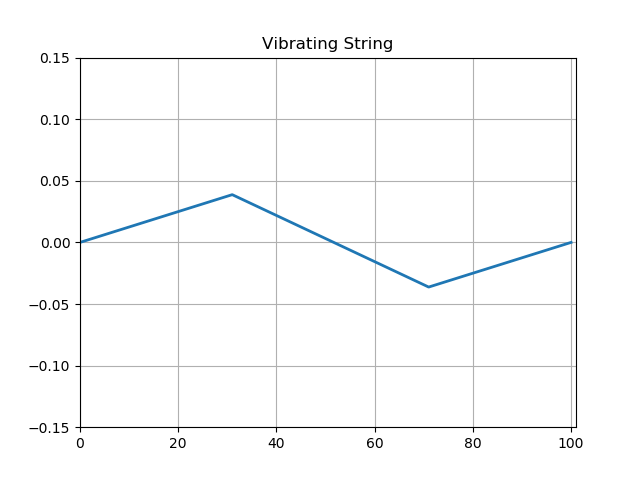

finished


In [3]:
rho = 0.01                                                # string density
ten = 40.                                                  # string tension
c = sqrt(ten/rho)                                       # Propagation speed
c1 = c                                                      # CFL criterium
ratio =  c*c/(c1*c1)
xi = np.zeros( (101, 3), float)             # initial 101 x's & 3 t's 
k = arange(101)

def initio():
    for i in range(0, 81):  xi[i, 0] = 0.00125*i          # Initial plucked 1st
    for i in range (81, 101):  xi[i, 0] = 0.1 - 0.005*(i - 80)  # 2nd part of string
         
initio()                                # plot string initial position   
fig = plt.figure()                           
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, 101), ylim=(-0.15, 0.15))
ax.grid()                                        
plt.title("Vibrating String")
line, = ax.plot(k, xi[:101,0], lw=2)             # x axis, y values, linewidth=2     

for i in range(1, 100):         # time stepping  algorithm
    xi[i, 1] = xi[i, 0] + 0.5*ratio*(xi[i + 1, 0] + xi[i - 1, 0] - 2*xi[i, 0])   

def animate(num):               #num: dummy,  algorithm, will plot (x, xi)            
    for i in range(1, 100):              
        xi[i,2] = 2.*xi[i,1]-xi[i,0]+ratio*(xi[i+1,1]+xi[i-1,1]-2*xi[i,1])
    line.set_data(k,xi[k,2])                              # data to plot ,x,y           
    for m in range (0,101):                               # part of algorithm
        xi[m, 0] = xi[m, 1]                                    # recycle array 
        xi[m, 1] = xi[m, 2]
    return line,
ani = animation.FuncAnimation(fig, animate,1)           
plt.show()             
print("finished")